In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import librosa
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [3]:
y_main, sr = librosa.load('../data/raw/Single-bass/bass_electronic_018-026-127.wav')
# y_main, sr = librosa.load('../data/raw/Bass/bass_electronic_018-061-050.wav')
# y_main, sr = librosa.load('../data/raw/Single-bass/bass_electronic_018-061-050.wav')
# y_mel, sr_mel = librosa.load('../models/generated_samples/new_librosa-mel.wav')
y_mel, sr_mel = librosa.load('mel_process.wav')
y_stft, sr_stft = librosa.load('stft_process.wav')
print(f'y_main: {y_main[:10]}')
print(f'y_mel: {y_mel[:10]}')
print(f'y_spectro: {y_stft[:10]}')

print('---')

print(f'shape y_main: {y_main.shape}')
print(f'shape y_mel: {y_mel.shape}')
print(f'shape y_spectro: {y_stft.shape}')

print('---')

print(f'sr: {sr}')
print(f'sr_mel: {sr_mel}')
print(f'sr_spectro: {sr_stft}')

y_main: [ 1.5835236e-07  1.0255552e-07 -3.0007371e-07  2.6422754e-07
  6.7293620e-08 -3.0847150e-07  3.9410335e-07 -4.7631865e-08
 -3.0378098e-07  4.7306108e-07]
y_mel: [0.01909781 0.02425289 0.02796721 0.02961171 0.029737   0.02963138
 0.03044677 0.03250146 0.03521013 0.03762305]
y_spectro: [-2.3841858e-07  5.9604645e-07  2.1457672e-06  4.0531158e-06
  6.5565109e-06  9.6559525e-06  1.2636185e-05  1.6331673e-05
  2.0503998e-05  2.4676323e-05]
---
shape y_main: (88200,)
shape y_mel: (81408,)
shape y_spectro: (81408,)
---
sr: 22050
sr_mel: 22050
sr_spectro: 22050


In [4]:
onset_env = librosa.onset.onset_strength(y=y_main, sr=sr)
tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr)
tempo

array([117.45383523])

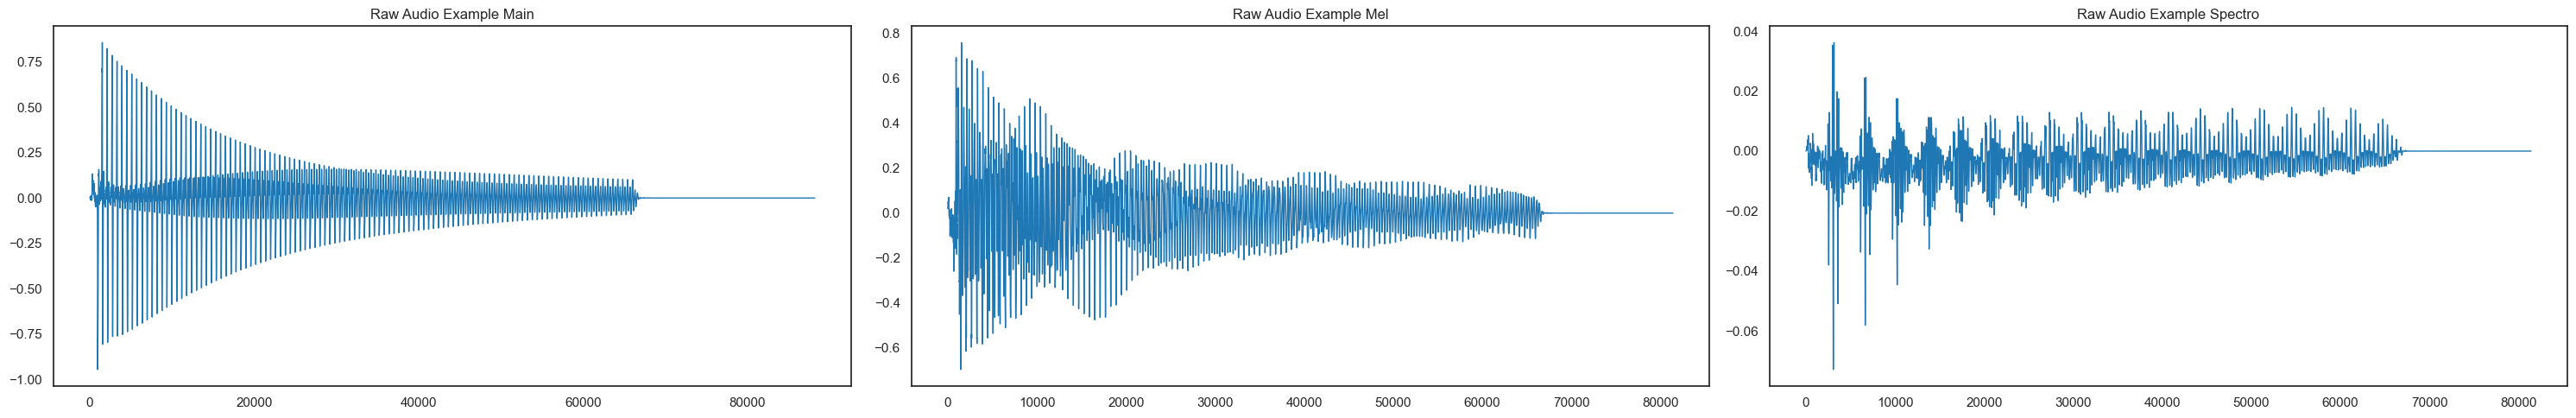

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

pd.Series(y_main).plot(ax=axs[0],
                        lw=1,
                        title='Raw Audio Example Main',
                        color=color_pal[0])

pd.Series(y_mel).plot(ax=axs[1],
                        lw=1,
                        title='Raw Audio Example Mel',
                        color=color_pal[0])

pd.Series(y_stft).plot(ax=axs[2],
                        lw=1,
                        title='Raw Audio Example Spectro',
                        color=color_pal[0])

plt.tight_layout()
plt.show()

In [5]:
D_main = librosa.stft(y_main)
D_mel = librosa.stft(y_mel)
D_stft = librosa.stft(y_stft)

S_db_main = librosa.amplitude_to_db(np.abs(D_main), ref=np.max)
S_db_mel = librosa.amplitude_to_db(np.abs(D_mel), ref=np.max)
S_db_stft = librosa.amplitude_to_db(np.abs(D_stft), ref=np.max)

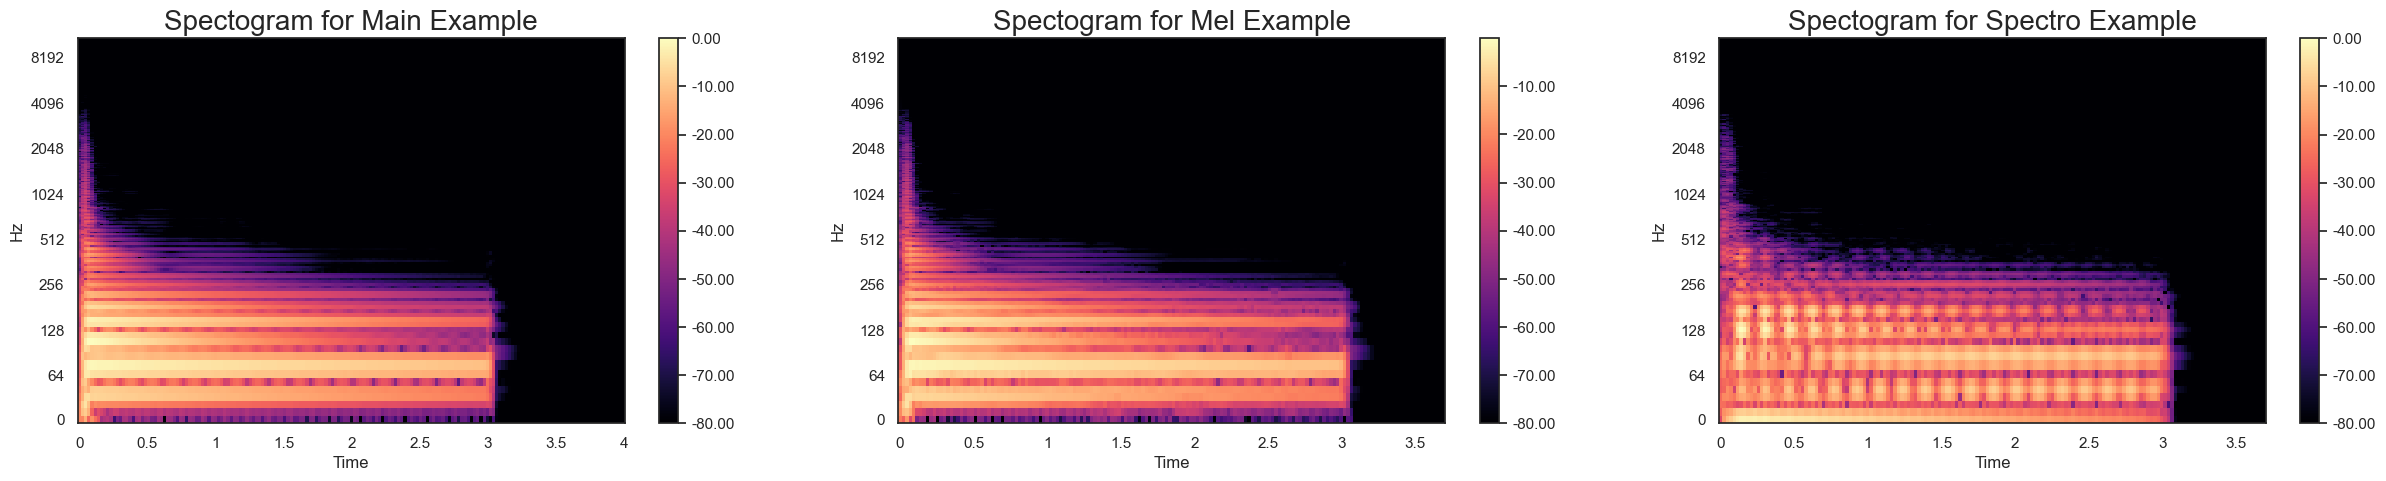

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

img = librosa.display.specshow(S_db_main,
                              x_axis='time',
                              y_axis='log',
                              ax=axs[0])
axs[0].set_title('Spectogram for Main Example', fontsize=20)
fig.colorbar(img, ax=axs[0], format=f'%0.2f')

img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=axs[1])
axs[1].set_title('Spectogram for Mel Example', fontsize=20)
fig.colorbar(img, ax=axs[1], format=f'%0.2f')


img = librosa.display.specshow(S_db_stft,
                              x_axis='time',
                              y_axis='log',
                              ax=axs[2])
axs[2].set_title('Spectogram for Spectro Example', fontsize=20)
fig.colorbar(img, ax=axs[2], format=f'%0.2f')


plt.show()